# Creating visualisations using weather data

Uses data from the openweathermap.org API, put into a SQLite database. 

In [1]:
# Read the forecast table

import sqlite3
import pandas as pd

conn = sqlite3.connect("forecast.db")
df = pd.read_sql_query("SELECT * FROM forecast", conn)
conn.close()

In [2]:
df.head()

,forecast_time,city,temperature,feels_like,wind_speed,humidity,description,timestamp
0,2025-10-29 21:00:00,Brighton,9.80,6.34,8.28,90.0,broken clouds,2025-10-29 18:50:25
1,2025-10-30 00:00:00,Brighton,9.23,5.61,8.24,82.0,scattered clouds,2025-10-29 18:50:25
2,2025-10-30 03:00:00,Brighton,8.57,4.88,7.76,79.0,clear sky,2025-10-29 18:50:25
3,2025-10-30 06:00:00,Brighton,8.20,4.92,6.11,76.0,few clouds,2025-10-29 18:50:25
4,2025-10-30 09:00:00,Brighton,10.09,9.01,5.17,71.0,scattered clouds,2025-10-29 18:50:25


In [13]:
from datetime import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['forecast_time'] = pd.to_datetime(df['forecast_time'])

In [19]:
df['timestamp'].dt.date.unique()

array([datetime.date(2025, 10, 29), datetime.date(2025, 11, 11)],
      dtype=object)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

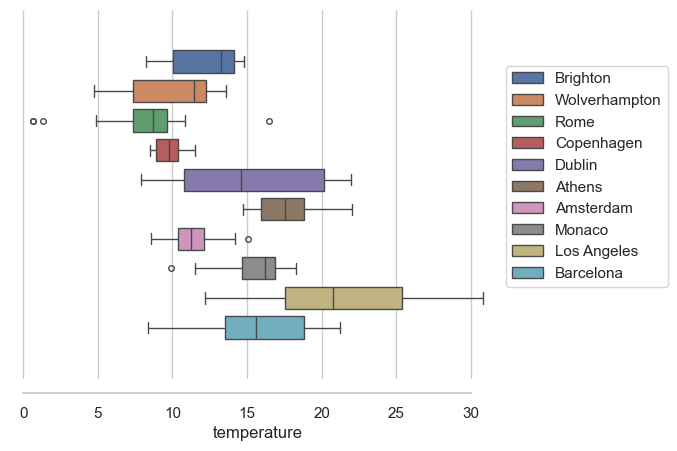

In [61]:
sns.set_theme(style="whitegrid", font='sans-serif', font_scale=1, color_codes=True, palette='deep')
sns.boxplot(hue='city', 
            gap=0.25,
            fliersize=4,
            x='temperature', 
            data=df)
plt.legend(loc=(1,0.25))
sns.despine(offset=10, trim=True);
#plt.tight_layout;

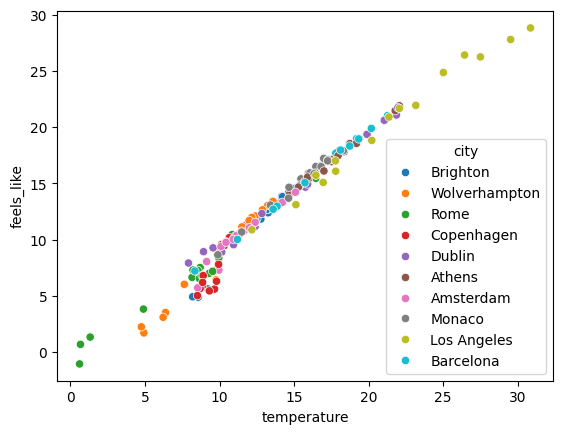

In [5]:
sns.scatterplot(x='temperature', y='feels_like', data=df, hue='city');